In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('winequality-red.csv')
dataset.head()
#dataset.describe()
#dataset.info()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
dataset['quality'].unique()
dataset['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

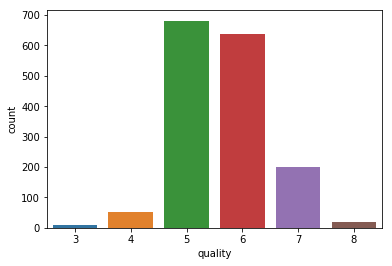

In [4]:
sns.countplot(x='quality', data = dataset)

In [5]:
division = (0,6,10)
group_names = ['not good','good']
dataset['quality']= pd.cut(dataset['quality'],bins=division,labels= group_names)

In [6]:
dataset['quality'].value_counts()

not good    1382
good         217
Name: quality, dtype: int64

In [7]:
X=dataset.iloc[:,:-1]
X.head()
y= dataset['quality']
y.head()

0    not good
1    not good
2    not good
3    not good
4    not good
Name: quality, dtype: category
Categories (2, object): [not good < good]

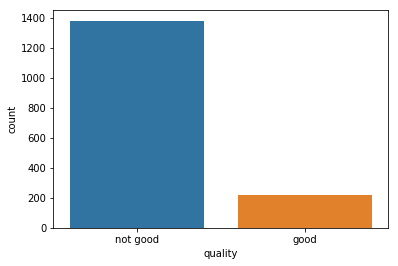

In [8]:
sns.countplot('quality',data = dataset)

In [9]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
label = LabelEncoder()
y = label.fit_transform(y)

sc = StandardScaler()
X = sc.fit_transform(X)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y , test_size= 0.2, random_state= 0)

In [11]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix, classification_report,roc_curve,auc
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.53      0.77      0.63        30
          1       0.97      0.93      0.95       290

avg / total       0.93      0.92      0.92       320



In [13]:
print(confusion_matrix(y_test,y_pred))

[[ 23   7]
 [ 20 270]]


In [22]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
auc_curve = auc(false_positive_rate, true_positive_rate)
print(auc_curve)

0.8488505747126436


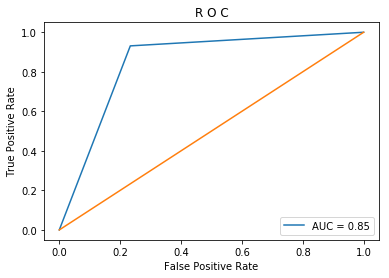

In [36]:
plt.plot(false_positive_rate, true_positive_rate,label='AUC = %0.2f'%auc_curve)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('R O C')
plt.show()